## 从文件中读取数据
将格式化的文件数据读取为naarray. 
1. 通过python读取文件，处理后转为多维数组
2. numpy.loadtxt() #用numpy直接读取文本文件

<font color=#FF69B4>numpy. loadtxt(filename,type,comments='#',delimiter=None, skiprow=0,usecols=None)    
filename  是文件名 ； dtype 是读入数据的格式 ； comments = '#'  '#' 开头注释行就会跳过。    
delemiter  行内数据的分隔符，空格的话numpy会自动判断 ； skiprows 跳过文件的前 (0) 行 ； usecols 只使用文本文件的(m-n)列数据,默认全部使用。 </font>   
  
https://www.cnblogs.com/hecc/p/8480532.html

## Matplotlib 
1.语法简单    
2.基本兼容matlab的绘图命令   
<font color=#FF69B4>
import numpy as np   
from matplotlib import pyplot as plt   
x = np.linspace(-4,4,100)   # -4 到 4 之间等分100作为x坐标   
y = x*x     
plt.title("d point in total" %(len(y)))  # 图的标题   
plt.xlabel("x") #x的标签   
plt.ylabel("y")  # y 的标签   
plt.plot(x*y) #绘制线形的函数，只需传入x和y的数据 
plt.show()   # 显示图</font>   
参考链接：   
https://blog.csdn.net/The_lastest/article/details/79828638      
https://www.runoob.com/numpy/numpy-matplotlib.html    
https://mp.weixin.qq.com/s/vr-pURyPkH5gGzgysRhwQQ    






## 绘制分段函数


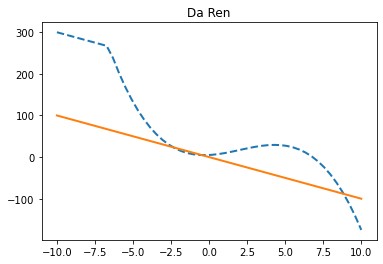

In [1]:
import matplotlib.pyplot as plt   # 引入pyplot 模块   
import numpy as np     # 引入numpy 库   
def func(x):        #函数1
    return 5+2*x+3*x**2-0.5*x**3
def fund(x):        #函数2
    return 200-10*x
x = np.linspace(-10,10,50)  #-10 到 10 之间等分50作为x坐标
def min_Eform1(x):
    return min(func(x),fund(x))
ys = list(map(min_Eform1,x))  #  map高阶函数，把作用符作用在x上，得到对应每个x的min(func(x),fund(x))
yy = -1*x*10   #第二个y数据
plt.plot(x,ys,ls='--',lw=2 ) #绘制线性图，虚线，线宽2
plt.plot(x,yy,'-',lw=2)   #添加第二条线，直线，线宽2 注意是小写L
plt.title("Da Ren")
plt.savefig('class4',dpi=300)  # 存储为class4.png """
plt.show() 

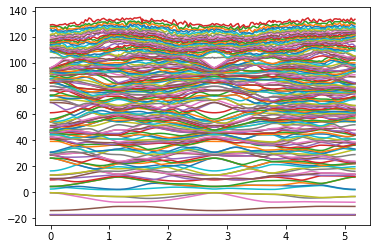

In [2]:
data = np.loadtxt("BAND-REFORMATTED.dat")  #加载成列表
plt.plot(data[:,0],data[:,1:])  #:代表所有行，第一列代表x轴，第二列代表y轴. 也可以把多维数组传递进来，可以自动拆分。
plt.show()

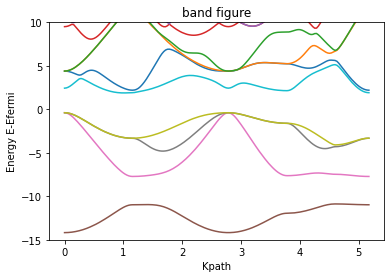

In [3]:
data = np.loadtxt("BAND-REFORMATTED.dat")  #加载成列表
for i in range(1,data.shape[1]):   #取列数，从第一列开始取一直到最后一列。
	plt.plot(data[:,0],data[:,i])  
plt.ylim(-15,10)   #显示区间数
plt.xlabel('Kpath')
plt.ylabel('Energy E-Efermi')
plt.title("band figure")
plt.show()


### 标记高对称点位置

In [4]:
with open("KLABELS",'r') as reader: #从KLABELS 读进来
	all_ = reader.readlines()   #readlines 是 全部读取进来放在一个列表里面,每一行作为list的一个元素，并且每行末含有换行符\n。
print(all_[1:])  #跳过第一行
#如何筛选出我们想要的行，可以查看该行的列数与上一行是否一致。如果小于2，不认为是有效数据。
for i in all_[1:]:  #按列表里面的元素，逐个打印，变成多行列表。
	print(i.split())  #  #把之前列表每一个元素，也就是一行，按空格拆分，打印的每行列表用逗号隔开。


['GAMMA              0.000\n', 'X                  1.153\n', 'U|K                1.560\n', 'GAMMA              2.783\n', 'L                  3.781\n', 'W                  4.597\n', 'X                  5.173\n', ' \n', ' \n', "* Give the label for each high symmetry point in KPOINTS (KPATH.in) file. Otherwise, they will be identified as 'Undefined' in KLABELS file\n"]
['GAMMA', '0.000']
['X', '1.153']
['U|K', '1.560']
['GAMMA', '2.783']
['L', '3.781']
['W', '4.597']
['X', '5.173']
[]
[]
['*', 'Give', 'the', 'label', 'for', 'each', 'high', 'symmetry', 'point', 'in', 'KPOINTS', '(KPATH.in)', 'file.', 'Otherwise,', 'they', 'will', 'be', 'identified', 'as', "'Undefined'", 'in', 'KLABELS', 'file']


In [5]:
with open("KLABELS",'r') as reader: #从KLABELS 读进来
	all_ = reader.readlines()   #readlines 是 全部读取进来放在一个列表里面,每一行作为list的一个元素，并且每行末含有换行符\n。
#print(all_[1:])  #跳过第一行
#如何筛选出我们想要的行，可以查看该行的列数与上一行是否一致。如果小于2，不认为是有效数据。
for i in all_[1:]:  #按列表里面的元素，逐个打印，变成多行列表。
	tmp = i.split()
	if len(tmp) < 2:  #如果某一行的列数小于2就截止
		break
	else:
		print(tmp) 

['GAMMA', '0.000']
['X', '1.153']
['U|K', '1.560']
['GAMMA', '2.783']
['L', '3.781']
['W', '4.597']
['X', '5.173']


### KLABELS 在能量图的位置加进来  


In [7]:
with open("KLABELS",'r') as reader: #从KLABELS 读进来
	all_ = reader.readlines()   #readlines 是 全部读取进来放在一个列表里面,每一行作为list的一个元素，并且每行末含有换行符\n。
klabel_s = []  #创建空列表
kpath_coord = []

for i in all_[1:]:  #按列表里面的元素，逐个打印，变成多行列表。
	tmp = i.split()
	if len(tmp) < 2:  #如果某一行的列数小于2就截止
		break
	else:
		klabel_s.append(tmp[0])      #把tmp的第一个元素增加（append）到上面所创建的空列表里面。
		kpath_coord.append(float(tmp[1]))  #把第二列数字转变为浮点数，并添加到空列表里面。
print(klabel_s,kpath_coord)

['GAMMA', 'X', 'U|K', 'GAMMA', 'L', 'W', 'X'] [0.0, 1.153, 1.56, 2.783, 3.781, 4.597, 5.173]


### 人为在哪些点设置标签  plt.xticks(kpath_coord,klabel_s)  。 添加辅助线 横线：axhline，竖线：axvline。

['GAMMA', 'X', 'U|K', 'GAMMA', 'L', 'W', 'X'] [0.0, 1.153, 1.56, 2.783, 3.781, 4.597, 5.173]
1.153
1.56
2.783
3.781
4.597


/var/folders/00/dr3rvfv931j3b4l3jzxfd0280000gn/T/ipykernel_10668/2492774508.py:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dipi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("band.figure.png",dipi=300)


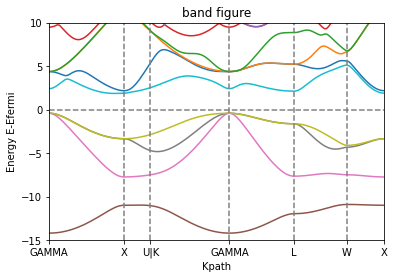

In [22]:
with open("KLABELS",'r') as reader: #从KLABELS 读进来
	all_ = reader.readlines()   #readlines 是 全部读取进来放在一个列表里面,每一行作为list的一个元素，并且每行末含有换行符\n。
klabel_s = []  #创建空列表
kpath_coord = []

for i in all_[1:]:  #按列表里面的元素，逐个打印，变成多行列表。
	tmp = i.split()
	if len(tmp) < 2:  #如果某一行的列数小于2就截止
		break
	else:
		klabel_s.append(tmp[0])      #把tmp的第一个元素增加（append）到上面所创建的空列表里面。
		kpath_coord.append(float(tmp[1]))  #把第二列数字转变为浮点数，并添加到空列表里面。
print(klabel_s,kpath_coord)

data = np.loadtxt("BAND-REFORMATTED.dat")  #加载成列表
for i in range(1,data.shape[1]):   #取列数，从第一列开始取一直到最后一列。
	plt.plot(data[:,0],data[:,i])  
plt.ylim(-15,10)   #显示区间数
plt.xlim(min(kpath_coord),max(kpath_coord))   #设置x的取值范围。
plt.xlabel('Kpath')
plt.ylabel('Energy E-Efermi')
plt.title("band figure")  
plt.xticks(kpath_coord,klabel_s)  #人为在哪些点设置标签  
plt.axhline(y=0, xmin=0, xmax=1 , linestyle="--", color="grey") #位置在y=0的位置。
# 需要在高对称点上加一个竖线，通过迭代的方式进行。
for i in kpath_coord[1:-1]:  #[1:-1]不需要在第一个位置和最后一个位置添加Gamma
	plt.axvline(x=i, ymin=0, ymax=1 , linestyle="--", color="grey")
	print(i)
plt.savefig("band.figure.png",dipi=300)
plt.show()